## EXAMEN 1

1) Carga y visualización de la imagen

In [6]:
import numpy as np

JPEG
(1534, 800)
RGB


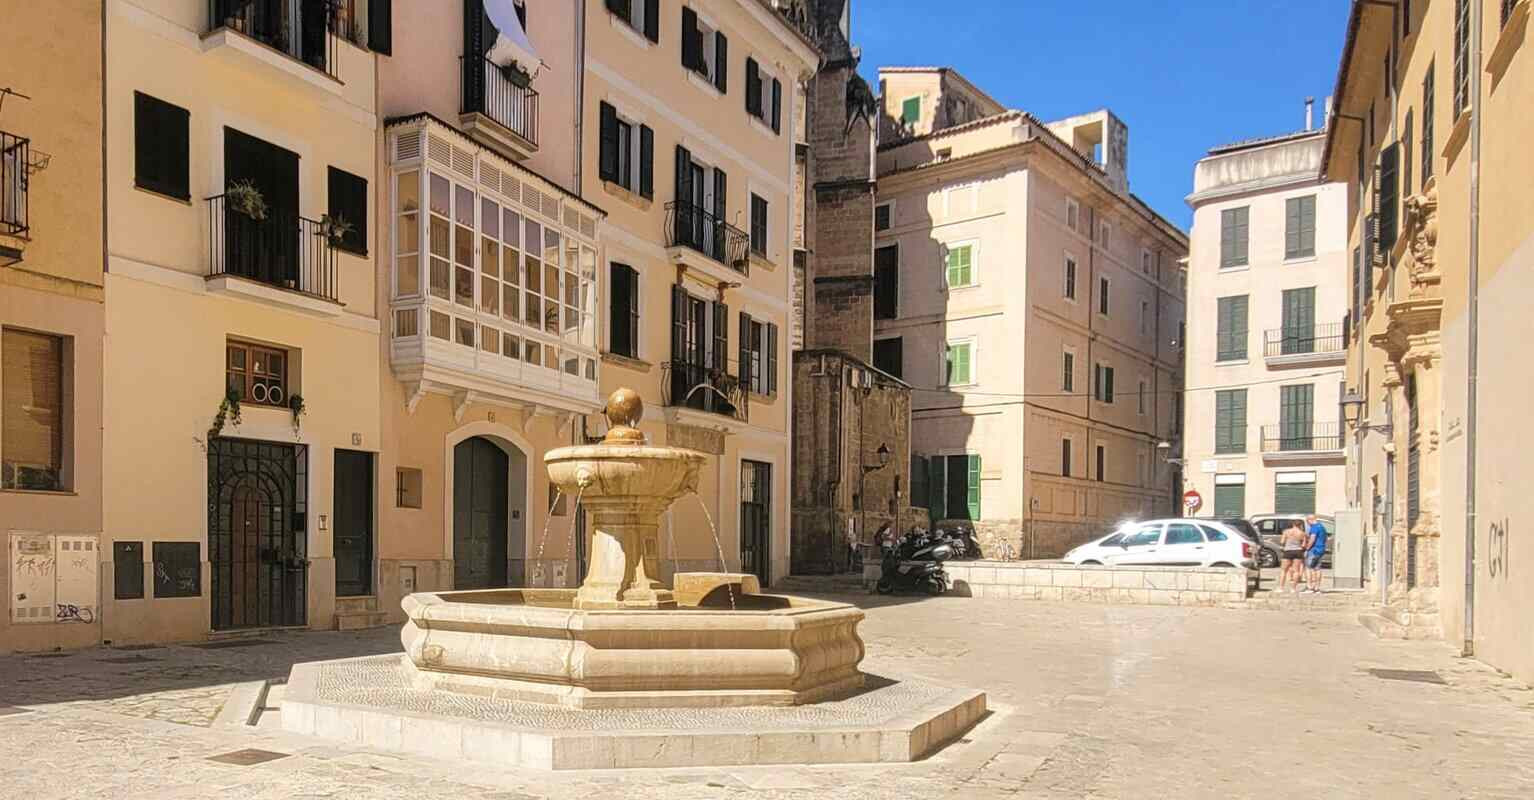

In [10]:
from PIL import Image

image = Image.open('images/palma.jpg')
# summarize some details about the image
print(image.format) #Format
print(image.size) #Tamany imatge (H,W)
print(image.mode) #Mode de imatge

display(image)

2) Análisis estadístico

In [15]:
#Convertir imagen an array
data = np.asarray(image)

#Valores globales

#media
print(np.mean(data))

#maximo
print(np.max(data))

#minimo
print(np.min(data))


145.4398995002173
255
0


In [42]:
#Para cada canal

data.shape

R=data[:,:,0]
G=data[:,:,1]
B=data[:,:,2]

#media
print(np.mean(R))
print(np.mean(G))
print(np.mean(B))
print("-"*10)

#maximo
print(np.max(R))
print(np.max(G))
print(np.max(B))
print("-"*10)

#minimo
print(np.min(R))
print(np.min(G))
print(np.min(B))
      

164.62761489569752
145.67825374837028
126.0138298565841
----------
255
255
255
----------
0
0
0


3) Conversión a escala de grises

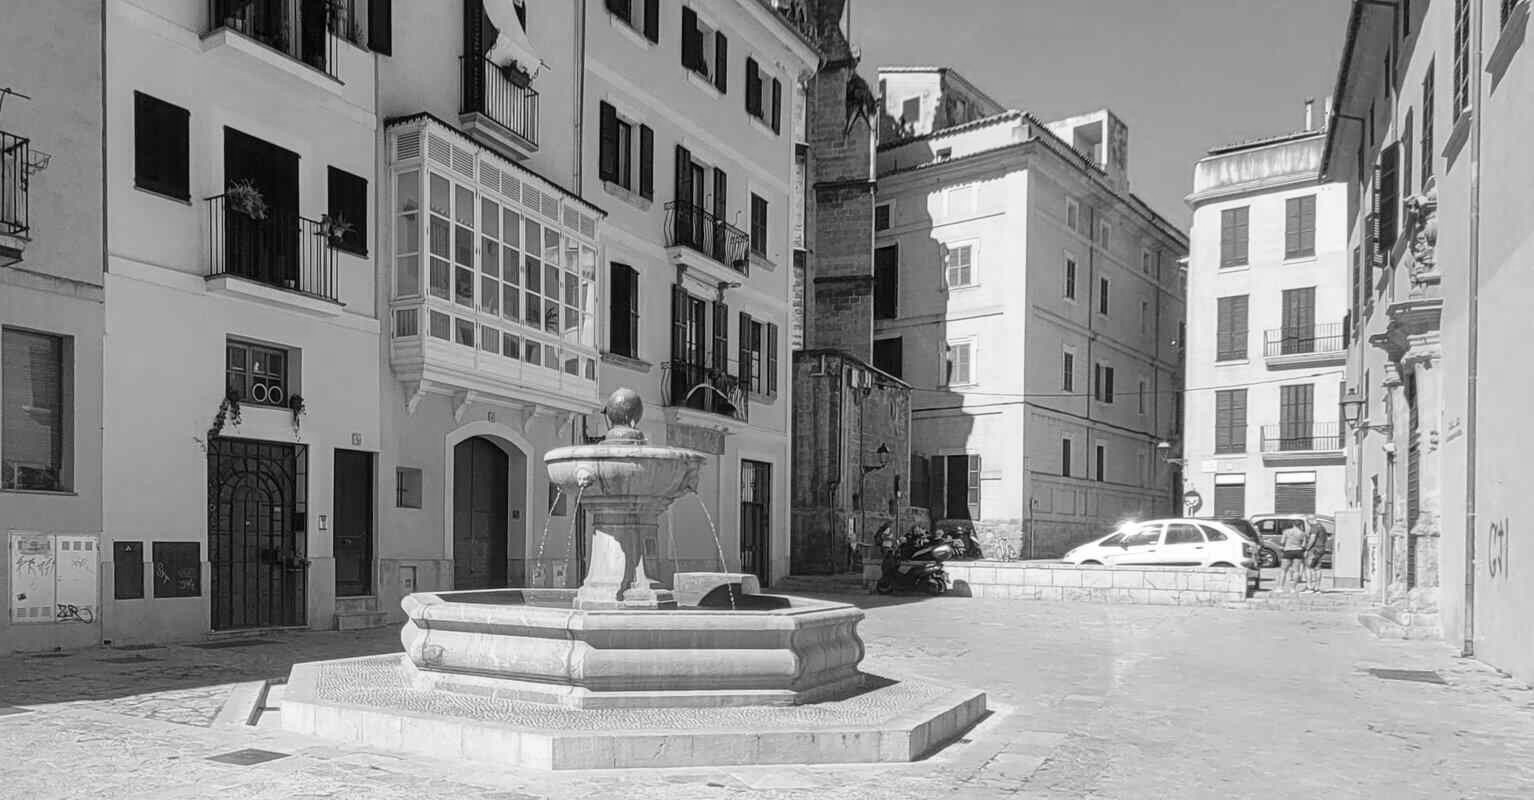

In [22]:
#1) Calcular Mitjana entre 3 capes dels pixels (w,h,1)
greyscale =np.mean(data, axis=2)
#Queda una matriu de mitjana de pixels

#2) Convertir greyscale com el tipus int
greyscale = greyscale.astype(np.uint8)

#3) Guardar imatge grisa i mostrar
#Image en majuscula per escriutre
gray_img= Image.fromarray(greyscale)
gray_img

4) Manipulación de la array 

In [187]:
data2 = data.copy()
data3 = data.copy()

Cambia el valor de todos los p´ıxeles de la primera fila a (0, 0, 0)

Per als dos primers apartats treballarem amb "data3"

In [190]:
data3.shape

(800, 1534, 3)

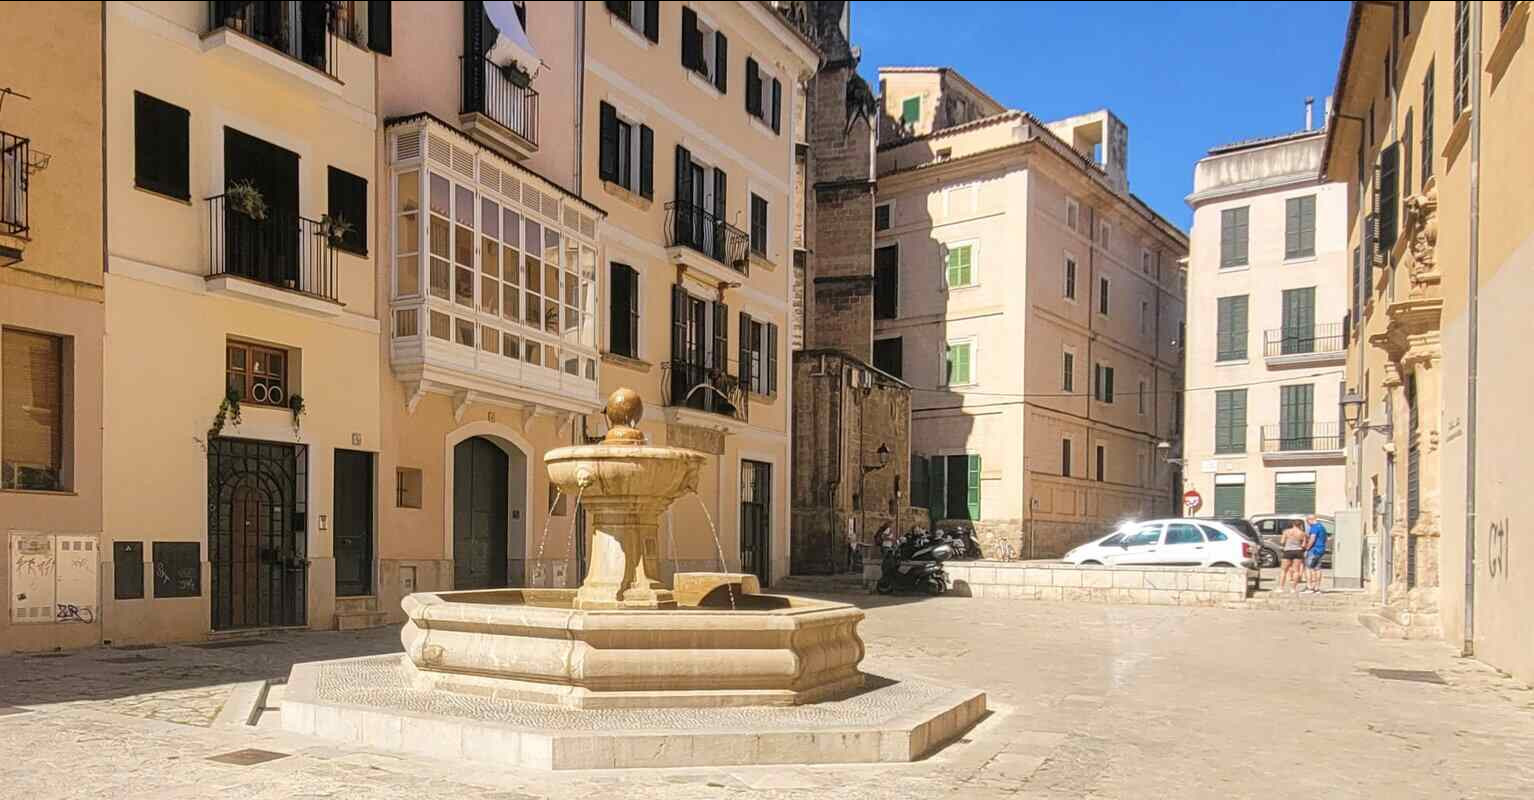

In [192]:
data3[0,:,:]= np.array([0,0,0])

#Visualitzar
img= Image.fromarray(data3)
img

Cambia el valor de todos los píxeles de la última columna a (255, 255, 255).


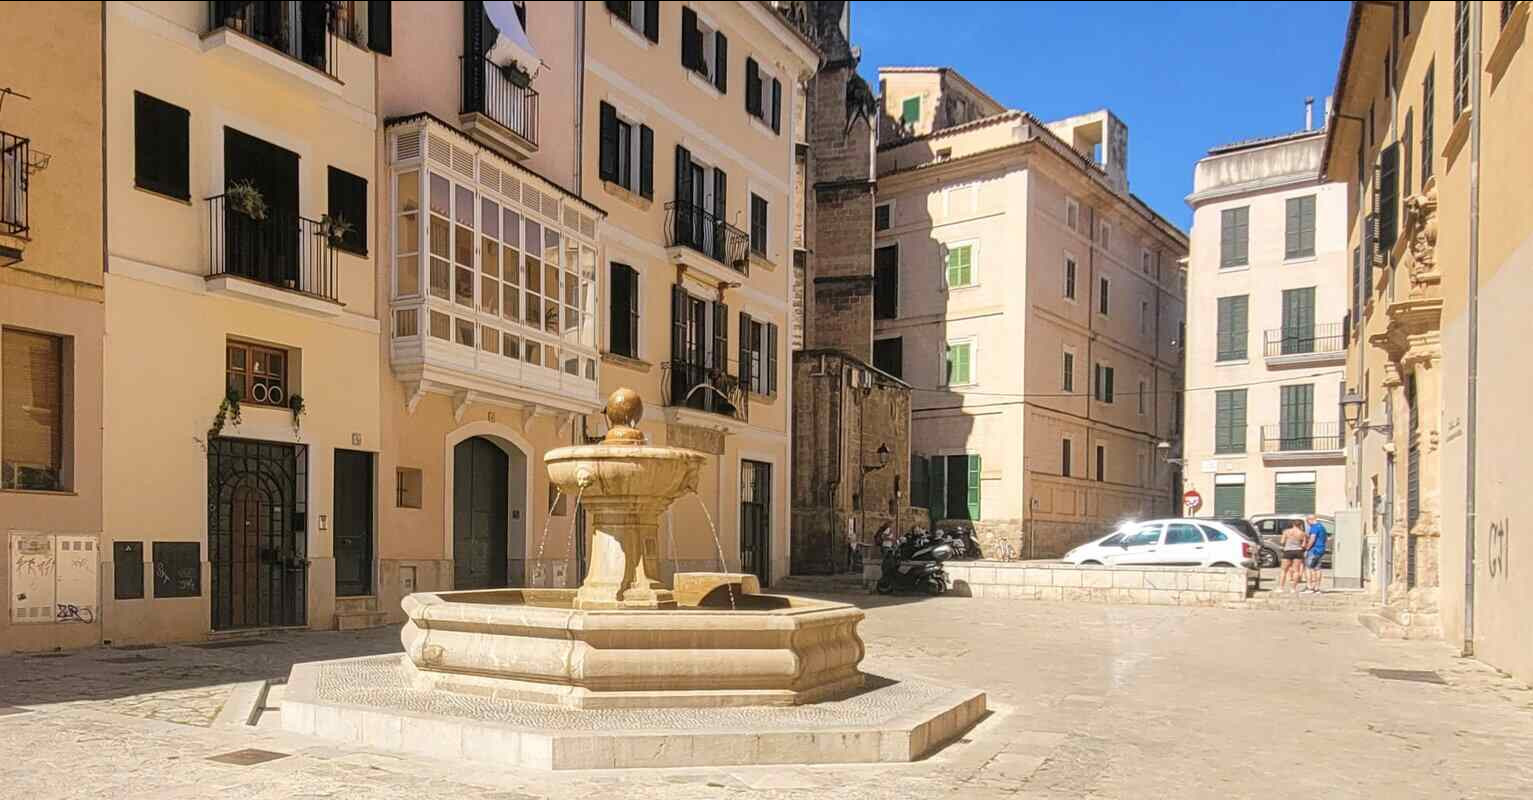

In [195]:
data3[:,-1,:]= np.array([255,255,255])

#Visualitzar
img= Image.fromarray(data3)
img

Identifica cuál es el color más frecuente en la imagen y sustituye todos estos
píxeles por el valor (128, 128, 128).

Fins ara hem treballat amb "data3", ara treballarem amb "data2"

In [212]:
#1) Obtenim els valors unics i frecs

#Axis=0 => Llista de Files uniques (sense repetirse)
unics, frecs = np.unique(data2.reshape(data2.shape[0]*data2.shape[1], data2.shape[2]), axis=0, return_counts=True)

print(unics) #LLista dels colors

print(frecs) #Frequencia de cada color

[[  0   0   0]
 [  0   0   2]
 [  0   0   4]
 ...
 [255 255 251]
 [255 255 253]
 [255 255 255]]
[ 79   2   4 ...  21  71 321]


In [213]:
#2) Argmax: POSICIÓ on es troba el màxim

np.argmax(frecs) #Saber quin apareix més vegades

86646

In [214]:
#3) Tornar, Recuperar el valor del argumento maximo

valor_mes_freq = unics[np.argmax(frecs)]

#Color més frequent
valor_mes_freq

array([218, 196, 172], dtype=uint8)

In [267]:
data2[:,:, 0] == valor_mes_freq[0] 

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [275]:
#4) Substituir

data2[np.argwhere(data2[:,:, 0] == valor_mes_freq[0])]= np.array([128,128,128])


IndexError: index 1485 is out of bounds for axis 0 with size 800

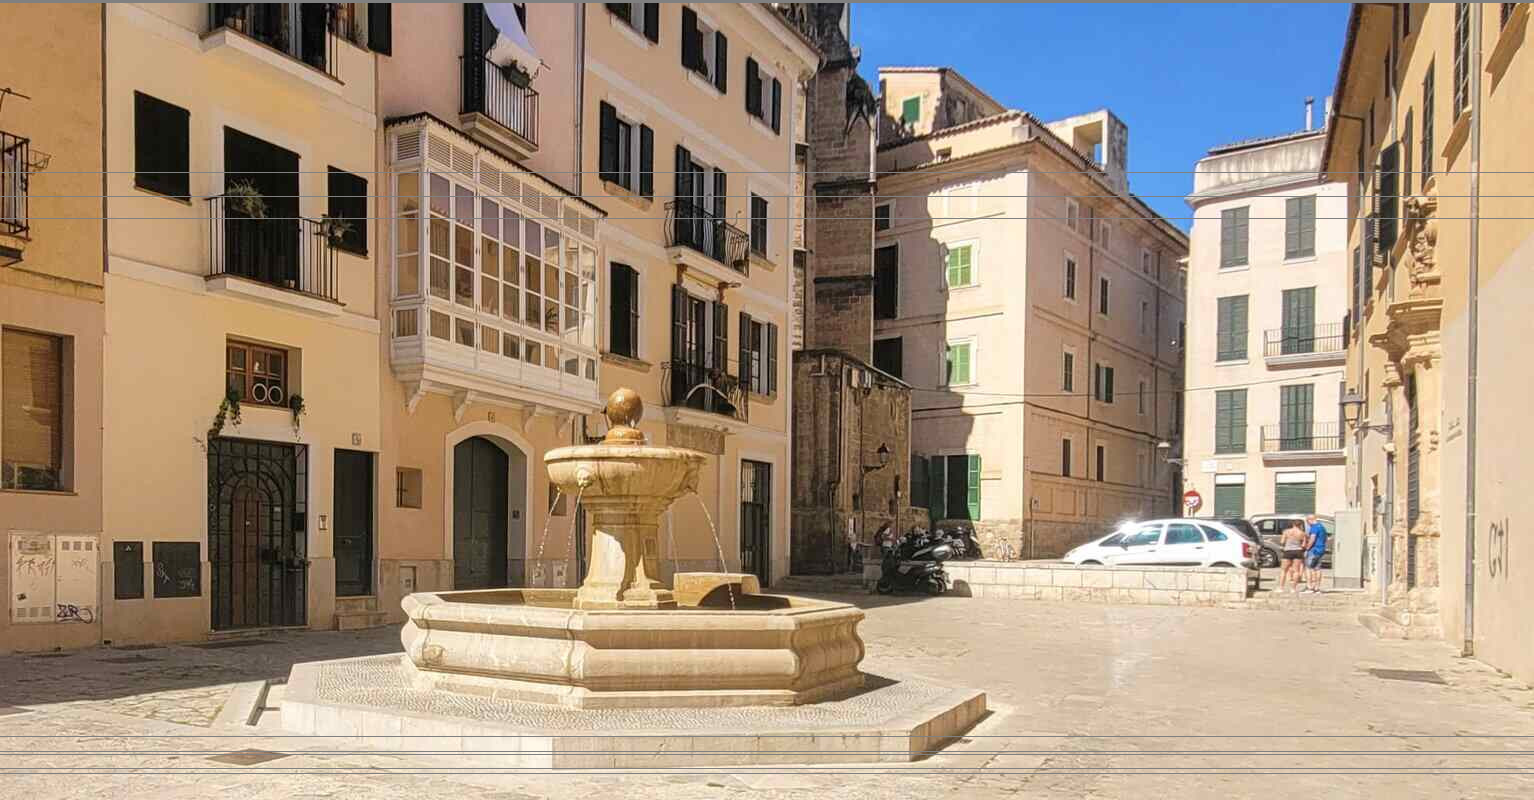

In [273]:
#5)Mostrar imatge
img= Image.fromarray(data2)
img